FFT size: 50000
Dominant Frequencies (Hz): [-1.249975e+09  1.249975e+09]
Corresponding Magnitudes: [112354.87713352 112354.87713352]


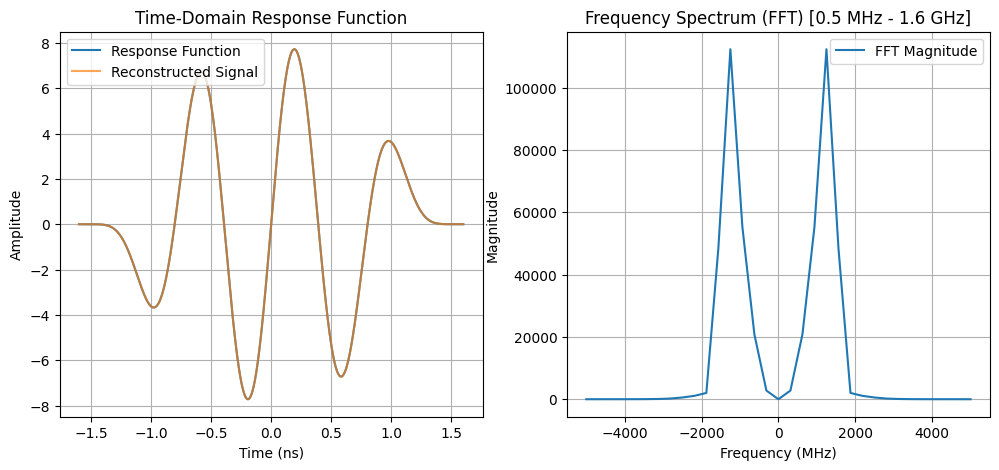

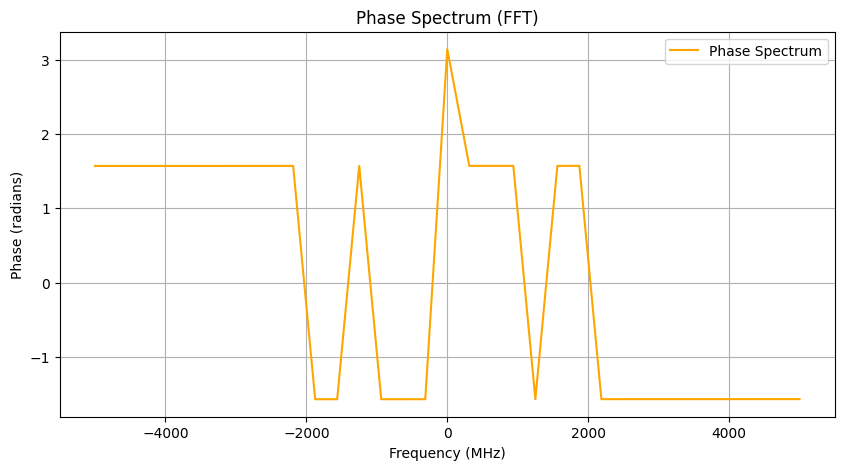

In [44]:
#linear scale with number of points=50000

import numpy as np
import matplotlib.pyplot as plt

# Define the response function
def response_function(Dt):
    return (63e9 * Dt) * (1 - 6.5e18 * Dt**2) * (1 - 1.55e18 * Dt**2) * (1 - (0.625e9 * Dt)**2)**8

# Time parameters
sampling_rate_Hz = 1e9  # High sampling rate (1 THz for good resolution)
wlL, wrL = -1.6e-9, 1.6e-9  # Time window limits
num_points = 50000  # Number of points for smooth FFT

# Generate time axis
time_axis_s = np.linspace(wlL, wrL, num_points)

# Compute response function in time domain
response_signal = response_function(time_axis_s)

# Compute FFT
fft_size = len(time_axis_s)
print("FFT size:",fft_size)
spectrum = np.fft.fft(response_signal)
freqs = np.fft.fftfreq(fft_size, d=(time_axis_s[1] - time_axis_s[0]))

# Shift FFT for visualization
spectrum_shifted = np.fft.fftshift(spectrum)
freqs_shifted = np.fft.fftshift(freqs)

# Convert frequencies to MHz
freqs_shifted_MHz = freqs_shifted * 1e-6

# Select the desired frequency range (0.5 MHz to 1.6 GHz)
mask = (freqs_shifted_MHz >= -5000) & (freqs_shifted_MHz <= 5000)

magnitude = np.abs(spectrum_shifted)

# Find the dominant frequency components (peaks in the magnitude)
peak_indices = np.argsort(magnitude)[-2:]  # Find indices of the top 5 frequency components

# Extract corresponding frequency values
dominant_frequencies = freqs_shifted[peak_indices]

reconstructed_signal = np.fft.ifft(spectrum)  # Inverse FFT
reconstructed_signal_real = np.real(reconstructed_signal[:num_points])  # Keep only real part

# Display the dominant frequencies and their magnitudes
print("Dominant Frequencies (Hz):", dominant_frequencies)
print("Corresponding Magnitudes:", magnitude[peak_indices])

# Plot Time-Domain Response
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time_axis_s * 1e9, response_signal, label="Response Function")
plt.plot(time_axis_s * 1e9, reconstructed_signal_real, label="Reconstructed Signal", alpha=0.7)
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Response Function")
plt.legend()
plt.grid()

# Plot Frequency-Domain Spectrum (Magnitude) in the selected range
plt.subplot(1, 2, 2)
plt.plot(freqs_shifted_MHz[mask], np.abs(spectrum_shifted[mask]), label="FFT Magnitude")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum (FFT) [0.5 MHz - 1.6 GHz]")
plt.legend()
plt.grid()

phase = np.angle(spectrum_shifted)

# Plot Phase Spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs_shifted_MHz[mask], phase[mask], label="Phase Spectrum", color="orange")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase (radians)")
plt.title("Phase Spectrum (FFT)")
plt.legend()
plt.grid()
plt.show()



len spectrum: 50000
Dominant Frequencies (Hz): [-1.249975e+09  1.249975e+09]
Corresponding Magnitudes: [112354.87713352 112354.87713352]


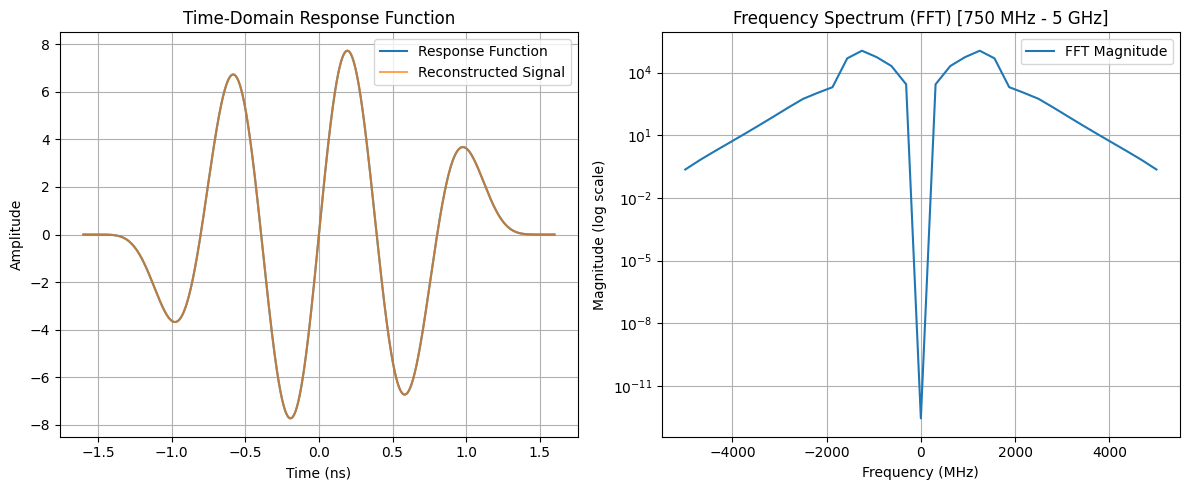

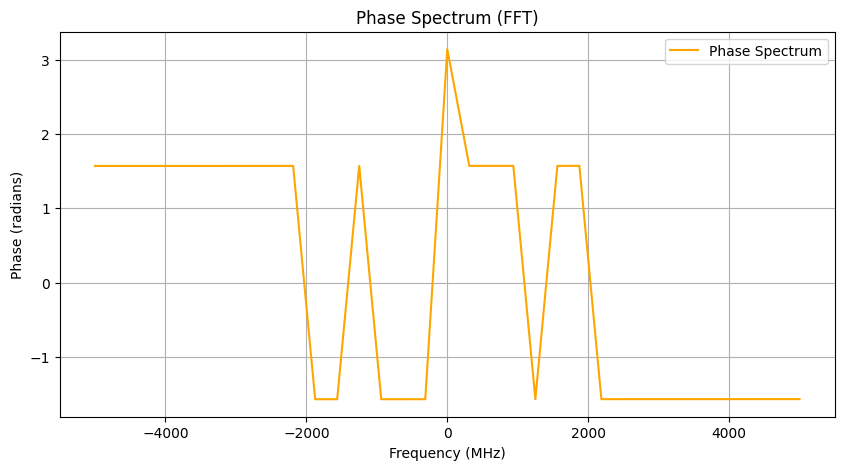

In [45]:
#logscale case with number_of_points=50000

import numpy as np
import matplotlib.pyplot as plt

# Define the response function
def response_function(Dt):
    return (63e9 * Dt) * (1 - 6.5e18 * Dt**2) * (1 - 1.55e18 * Dt**2) * (1 - (0.625e9 * Dt)**2)**8

# Improved time settings
sampling_rate_Hz = 1e9  # 1 THz sampling rate (fine resolution)
wlL, wrL = -1.6e-9, 1.6e-9  # Extend time window (-10 ns to +10 ns)
num_points = 50000  # Increase number of points for better FFT resolution

# Generate time axis
time_axis_s = np.linspace(wlL, wrL, num_points)

# Compute response function in time domain
response_signal = response_function(time_axis_s)

# Compute FFT
spectrum = np.fft.fft(response_signal) 
print("len spectrum:",len(spectrum))
freqs = np.fft.fftfreq(len(spectrum), d=(time_axis_s[1] - time_axis_s[0]))

# Shift FFT for visualization
spectrum_shifted = np.fft.fftshift(spectrum)
freqs_shifted = np.fft.fftshift(freqs)

# Convert to MHz
freqs_shifted_MHz = freqs_shifted * 1e-6

# Select range (0.5 MHz - 1.6 GHz)
mask = (freqs_shifted_MHz >= -5000) & (freqs_shifted_MHz <= 5000)

magnitude = np.abs(spectrum_shifted)

# Find the dominant frequency components (peaks in the magnitude)
peak_indices = np.argsort(magnitude)[-2:]  # Find indices of the top 5 frequency components

# Extract corresponding frequency values
dominant_frequencies = freqs_shifted[peak_indices]

reconstructed_signal = np.fft.ifft(spectrum)  # Inverse FFT
reconstructed_signal_real = np.real(reconstructed_signal[:num_points])  # Keep only real part

# Display the dominant frequencies and their magnitudes
print("Dominant Frequencies (Hz):", dominant_frequencies)
print("Corresponding Magnitudes:", magnitude[peak_indices])


# Plot Time-Domain Response
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time_axis_s * 1e9, response_signal, label="Response Function")
plt.plot(time_axis_s * 1e9, reconstructed_signal_real, label="Reconstructed Signal", alpha=0.7)
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Response Function")
plt.legend()
plt.grid()

# Plot Frequency Spectrum (Magnitude in dB for visibility)
plt.subplot(1, 2, 2)
plt.semilogy(freqs_shifted_MHz[mask], np.abs(spectrum_shifted[mask]), label="FFT Magnitude")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (log scale)")
plt.title("Frequency Spectrum (FFT) [750 MHz - 5 GHz]")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


phase = np.angle(spectrum_shifted)

# Plot Phase Spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs_shifted_MHz[mask], phase[mask], label="Phase Spectrum", color="orange")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase (radians)")
plt.title("Phase Spectrum (FFT)")
plt.legend()
plt.grid()
plt.show()

Dominant Frequencies (Hz): [-1.22187078e+09  1.22000817e+09 -1.22000817e+09  1.22093948e+09
 -1.22093948e+09]
Corresponding Magnitudes: [113029.91396504 113030.00249052 113030.00249052 113030.65990862
 113030.65990862]


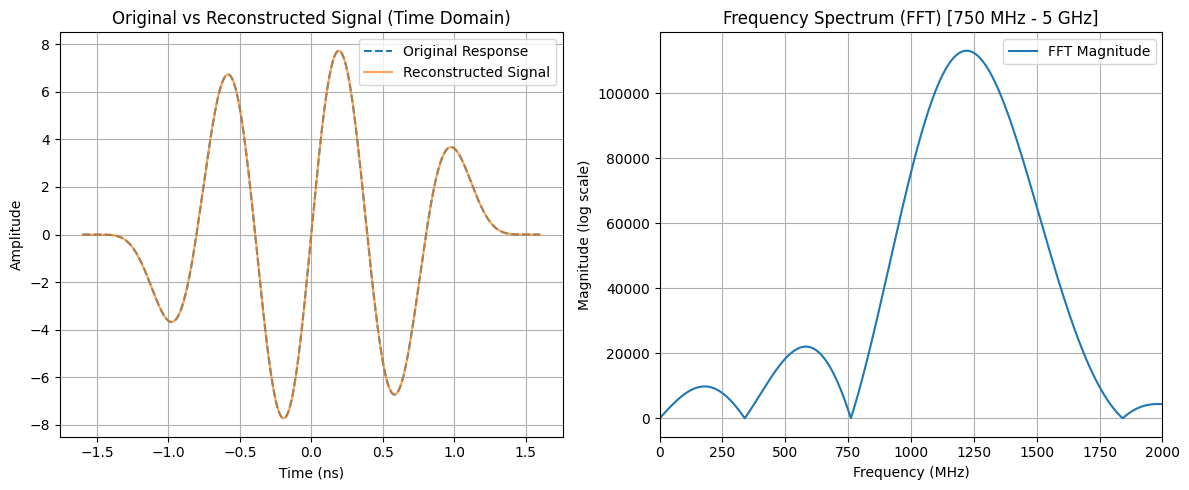

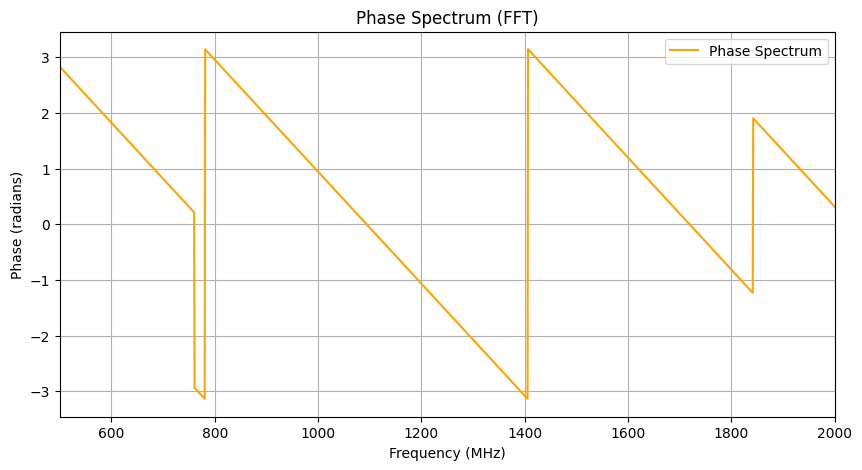

In [52]:
#zero padding case point=262144


import numpy as np
import matplotlib.pyplot as plt

# Define the response function
def response_function(Dt):
    return (63e9 * Dt) * (1 - 6.5e18 * Dt**2) * (1 - 1.55e18 * Dt**2) * (1 - (0.625e9 * Dt)**2)**8

# Improved time settings
sampling_rate_Hz = 1e9  # 1 GHz sampling rate
wlL, wrL = -1.6e-9, 1.6e-9  # Time window limits
num_points = 50000  # High resolution

# Generate time axis
time_axis_s = np.linspace(wlL, wrL, num_points)

# Compute response function in time domain
response_signal = response_function(time_axis_s)

# Compute FFT with zero-padding
spectrum = np.fft.fft(response_signal, n=2**24)
freqs = np.fft.fftfreq(len(spectrum), d=(time_axis_s[1] - time_axis_s[0]))

# Shift FFT for visualization
spectrum_shifted = np.fft.fftshift(spectrum)
freqs_shifted = np.fft.fftshift(freqs)

# Convert to MHz
freqs_shifted_MHz = freqs_shifted * 1e-6

# Select frequency range (750 MHz - 5 GHz)
mask = (freqs_shifted_MHz >=- 5000) & (freqs_shifted_MHz <= 5000)

magnitude = np.abs(spectrum_shifted)

# Find dominant frequency components
peak_indices = np.argsort(magnitude)[-5:]
dominant_frequencies = freqs_shifted[peak_indices]

print("Dominant Frequencies (Hz):", dominant_frequencies)
print("Corresponding Magnitudes:", magnitude[peak_indices])

# Apply Inverse FFT
reconstructed_signal = np.fft.ifft(spectrum)  # Inverse FFT
reconstructed_signal_real = np.real(reconstructed_signal[:num_points])  # Keep only real part

# Plot Time-Domain Response
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time_axis_s * 1e9, response_signal, label="Original Response", linestyle="--")
plt.plot(time_axis_s * 1e9, reconstructed_signal_real, label="Reconstructed Signal", alpha=0.7)

plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Original vs Reconstructed Signal (Time Domain)")
plt.legend()
plt.grid()

# Plot Frequency Spectrum
plt.subplot(1, 2, 2)
plt.plot(freqs_shifted_MHz[mask], magnitude[mask], label="FFT Magnitude")
plt.xlim((0,2000))
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (log scale)")
plt.title("Frequency Spectrum (FFT) [750 MHz - 5 GHz]")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

phase = np.angle(spectrum_shifted)

# Plot Phase Spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs_shifted_MHz[mask], phase[mask], label="Phase Spectrum", color="orange")
plt.xlim((500,2000))
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase (radians)")
plt.title("Phase Spectrum (FFT)")
plt.legend()
plt.grid()
plt.show()
